In [1]:
import xarray as xr
import matplotlib.pyplot as plt
from utility import analysis_parameters as ap
import cartopy.crs as ccrs
import numpy as np
import netCDF4 as nc
import dask
from dask.diagnostics import ProgressBar
pbar = ProgressBar()
pbar.register()

var="cli"
var1="rlut"
chunk_dict = {"lat":100, "lon":100, "latitude":100, "longitude":100}
diff=False


In [2]:
if var=="rlt":
    models = [ "SCREAMr0.25deg", "SAM", "ARPr0.25deg", "ICONr0.25deg"]
    models1= ["NICAM", "UM", "GEOSr0.25deg"]
    da = xr.open_dataset(ap.get_timmean_file("CERES","GT","rad_toa_1hm_JFM")).adj_atmos_lw_up_all_toa_1hm.mean(dim="time")
    mod = {"CERES 1HM":da}
    print(da.shape)
    
    chunk_dict = {"lat":100, "lon":100, "latitude":100, "longitude":100}

    for m in models:
        print(m)
        dmod = xr.open_dataset(ap.get_timmean_file(m, "GT", var), chunks=chunk_dict)[var][0]
        if m=="ARPr0.25deg":
            dmod=-dmod/900
        if diff:
            dam = da.interp({"lon":dmod.lon, "lat":dmod.lat})
            das = dmod - dam.values
            mod[m] = das
        else:
            mod[m] = dmod
    for m in models1:
        print(m)
        dmod = xr.open_dataset(ap.get_timmean_file(m, "GT", var1), chunks=chunk_dict)[var1][0]
        if m=="UM":
            dam = da.interp({"lon":dmod.longitude.values, "lat":dmod.latitude.values})
        else:
            dam = da.interp({"lon":dmod.lon, "lat":dmod.lat})
        if diff:
            das = dmod - dam.values
            mod[m] = das
        else:
            mod[m] = dmod

elif var=="cli":
    all_models = ["SCREAMr0.25deg", "UM", "NICAM", "SAM"]
    das = [xr.open_dataset(ap.get_timmean_file(m, "GT_14-18km", "cldfrac"), chunks=chunk_dict)[var] for m in all_models]

    mod = dict(zip(all_models, das))

FileNotFoundError: [Errno 2] No such file or directory: b'/work/bb1153/b380883/GT/timmean/timmean_GT_14-18km_SAM_cldfrac_20200130-20200228.nc'

0
1
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
2
[########################################] | 100% Completed |  1.5s
[########################################] | 100% Completed |  1.5s
3
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.2s
4
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.2s
5
[########################################] | 100% Completed |  3.6s
[########################################] | 100% Completed |  3.6s
6
[########################################] | 100% Completed |  0.6s
[########################################] | 100% Completed |  0.7s
7
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.2s


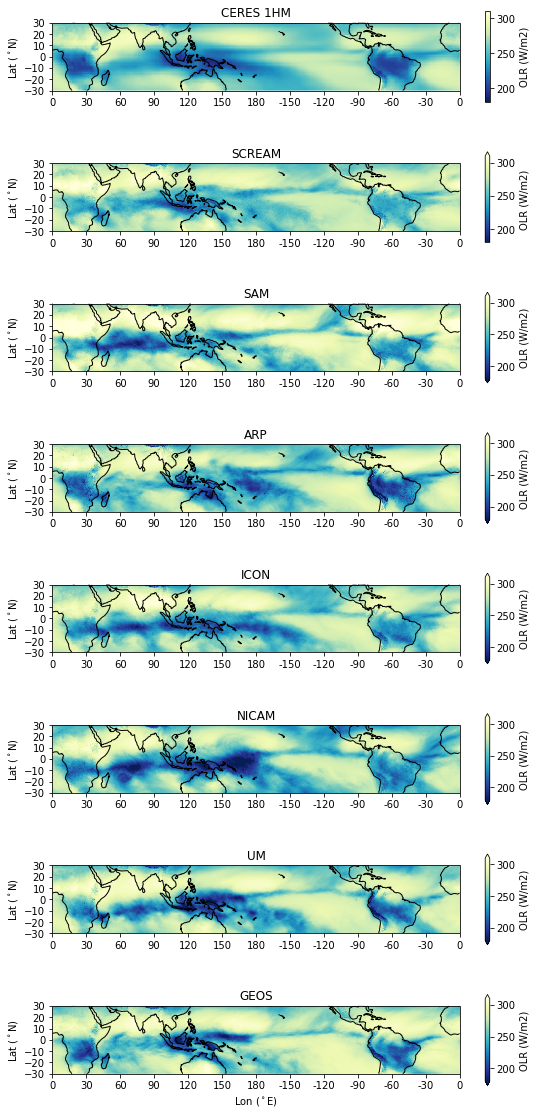

In [11]:
fig, ax = plt.subplots(len(mod),1, figsize=(8,2*len(mod)), 
                       subplot_kw={'projection':ccrs.PlateCarree(central_longitude=180)},
                       sharex=True, sharey=True)

if var[:3]=="cli":
    vmin, vmax = 0, 0.3
else:
    omin, omax = 180, 310
    dmin, dmax = -40, 40
i=0
for m in list(mod.keys()):
    print(i)
    if var=="cli":
        if m=="UM":
            lev="model_level_number"
        else:
            lev="lev"
        da = mod[m].mean(dim=[lev]).isel(time=0)
    else:
        da = mod[m]
    if diff:
        if m=="CERES 1HM":
            vmin=omin
            vmax=omax
            cmap = "YlGnBu_r"
        else:
            vmin, vmax = dmin, dmax
            cmap = "bwr"
    else:
        cmap="YlGnBu_r"
        vmin=omin
        vmax=omax

    da.plot(
        ax=ax[i],
        transform=ccrs.PlateCarree(),  
        cmap=cmap,
        vmin=vmin, vmax=vmax, add_colorbar=True,
        cbar_kwargs={"orientation": "vertical", "shrink": 0.7,"label":"OLR (W/m2)"},
        robust=True
    )
    ax[i].coastlines() 
    ax[i].set_title("")
    ax[i].set_ylabel("Lat ($^\circ$N)")
    ax[i].set_ylim([-30,30])
    ax[i].set_yticks(np.arange(-30,31,10))
    ax[i].set_xticks(np.arange(-180,181,30))
    # ax[i].set_xticklabels([], color='w')
    ax[i].set_xlabel("")
    ax[i].set_title(m.split("r")[0])
    # ax[i].plot(np.array([143,143,153,153,143])-180,[-5,5,5,-5,-5],color='r',lw=1)
    i+=1
ax[-1].set_xticklabels([0,30,60,90,120,150,180,-150,-120,-90,-60,-30,0],color='k')
ax[-1].set_xlabel("Lon ($^\circ$E)")
plt.tight_layout()

plt.savefig("../plots/GT/timmean_{}.png".format(var), dpi=250)
plt.show()

[########################################] | 100% Completed |  0.2s
[########################################] | 100% Completed |  0.2s


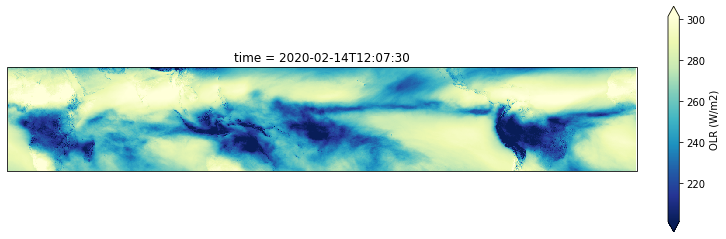

In [14]:
cmap = "YlGnBu_r"
vmin, vmax = 180, 310
fig, ax = plt.subplots(1,1, figsize=(10,4), 
                       subplot_kw={'projection':ccrs.PlateCarree(central_longitude=180)},
                       constrained_layout=True)

mod["ARPr0.25deg"].plot(
        transform=ccrs.PlateCarree(),  
        cmap=cmap,
        # vmin=vmin, vmax=vmax,
        cbar_kwargs={"orientation": "vertical", "shrink": 0.8,"label":"OLR (W/m2)", "extend":"both"},
        robust=True
    )
# plt.savefig("../plots/GT/cbar.png", dpi=400, bbox_inches="tight", pad_inches=2)
plt.show()

# TTL cld frac

In [ ]:
ds = xr.open_dataset("/work/bb1153/b380883/GT/timmean/timmean_GT_14-18km_SCREAMr0.25deg_ttlcldmask_20200130-20200228.nc").pfull
ds = ds.mean(dim=["time","lev"])
ds

In [ ]:
fig, ax = plt.subplots(3,1, figsize=(12,12), 
                       subplot_kw={'projection':ccrs.PlateCarree(central_longitude=180)},
                       constrained_layout=True)
cmap = "YlGnBu_r"
i=0
(ds*100).plot(transform=ccrs.PlateCarree(),  
              ax=ax[i],
            cmap=cmap,
            vmin=0, vmax=2,
            cbar_kwargs={"orientation": "vertical", "shrink": 0.5,"label":"TTL cld frac (%)"},
            robust=True
    )
ax[i].coastlines() 
ax[i].set_xticks(np.arange(-180,181,30))
ax[i].set_xticklabels([0,30,60,90,120,150,180,-150,-120,-90,-60,-30,0])
ax[i].set_yticks(np.arange(-30,31,10))
ax[i].set_title(all_models[i]+" "+var)
ax[i].set_xlabel("Lon ($^\circ$E)")
ax[i].set_ylabel("Lat ($^\circ$N)")
ax[i].set_ylim([-30,30])